In [ ]:
# 사용할 모듈 like include
from tensorflow.keras.datasets import mnist   # mnist를 바로 사용
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

In [ ]:
# mnist 데이터 로드, 유명한 데이터들은 keras 라이브러리에서 다운로드 가능
# 70,000장의 0,1,2,3,4,5,6,7,8,9 손글씨 (60,000 트레이닝, 10,000 테스트)
# 28x28 크기, 784 픽셀
# x_train:학습용 이미지,  y_train:학습용 이미지 레이블,  x_test:테스트용 이미지,  y_test:테스트용 이미지 레이블
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
print(x_train.shape)  # (60000, 28, 28)
print(x_test.shape)  # (10000, 28, 28)
print(y_train.shape)  # (60000,)
print(y_test.shape)  # (10000,)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


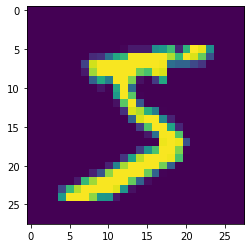

5


In [ ]:
plt.figure()
plt.imshow(x_train[0])
plt.show()

print(y_train[0])

In [ ]:
# 픽셀 값(0~255) to (0~1)
x_train = x_train / 255.0
x_test = x_test / 255.0

In [ ]:
num_classes = 10    # 분류할 클래스 개수

# one-hot encoding : 0~9 라벨을 10차원 0,1 벡터로 표현 예) 3 --> (0, 0, 0, 1, 0, 0, 0, 0, 0, 0)
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

print(y_train[0])

print(y_train.shape)  # (60000, 10)
print(y_test.shape)  # (10000, 10)

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
(60000, 10)
(10000, 10)


In [ ]:
# 순차모델
model = Sequential()
model.add(Flatten(input_shape = (28, 28)))  # in : (28, 28), out 784
model.add(Dense(128, activation='relu'))    # in : 784, out : 128
model.add(Dense(num_classes, activation='softmax'))   # in : 128, out : 10

# Dense : Fully Connected Layer
# activation : 활성화 함수, 노드에 들어오는 값들에 대해 곧바로 다음 레이어로 전달하지 않고 주로 비선형 함수를 통과시킨 후 전달, 
# 비선형 함수를 사용하는 이유는 선형함수를 사용할 시 층을 깊게 하는 의미가 줄어들기 때문, relu, tanh, leakyrelu, softmax 등..
# relu : 최근 가장 많이 사용되는 활성화 함수
# softmax : 입력받은 값을 0~1사이의 값으로 모두 정규화하며 출력 값들의 총합은 항상 1이 되는 특성을 가진 활성화 함수, 분류용!

In [ ]:
# 모델 출력
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# 학습 방법
# loss : 손실함수, 일반적으로 회귀문제에서는 MSE('mean_squared_error'), 분류문제에서는 Cross Entropy Error('crossentropy')를 활용
# optimizer : 모델 업데이트 방법, 손실함수를 최소화 하는 매개변수를 찾는 과정, Adam, SGD, RMSprop 등..
# metrics : 훈련 단계와 테스트 단계를 모니터링하기 위해 사용

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# 학습
# batch_size : 한번에 학습할 데이터의 갯수, 학습속도 vs 메모리
# epochs : 전체 데이터를 몇 번 반복해서 학습 시킬 것인가
# validation_data : 학습 중에 테스트할 데이터

history = model.fit(x_train, y_train, batch_size=128, epochs=5, verbose=1, validation_data=(x_test, y_test))

Epoch 1/5
469/469 [==============================] - 3s 4ms/step - loss: 0.3477 - accuracy: 0.9039 - val_loss: 0.2087 - val_accuracy: 0.9406
Epoch 2/5
469/469 [==============================] - 2s 4ms/step - loss: 0.1644 - accuracy: 0.9532 - val_loss: 0.1337 - val_accuracy: 0.9607
Epoch 3/5
469/469 [==============================] - 2s 3ms/step - loss: 0.1186 - accuracy: 0.9664 - val_loss: 0.1143 - val_accuracy: 0.9664
Epoch 4/5
469/469 [==============================] - 2s 3ms/step - loss: 0.0924 - accuracy: 0.9733 - val_loss: 0.0999 - val_accuracy: 0.9704
Epoch 5/5
469/469 [==============================] - 2s 3ms/step - loss: 0.0739 - accuracy: 0.9789 - val_loss: 0.0899 - val_accuracy: 0.9730


In [ ]:
# 테스트 이미지
test_imgs = x_test[:3]

In [ ]:
# 모델 테스트
pred_num = model.predict(test_imgs)

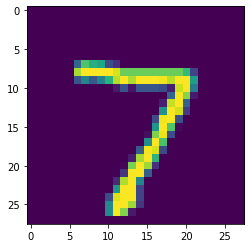

[2.3932664e-06 4.0484142e-08 1.0158383e-04 1.0100870e-03 1.0094691e-08
 1.2309539e-05 3.5082212e-10 9.9882442e-01 1.5763828e-06 4.7552618e-05]
Number is 7


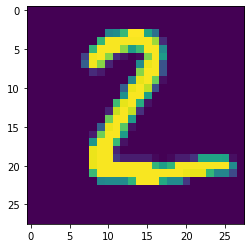

[7.2660060e-07 9.8821823e-05 9.9947530e-01 4.0692752e-04 2.0555317e-12
 1.1802055e-05 1.8931917e-06 3.7461028e-12 4.4738849e-06 3.6685252e-10]
Number is 2


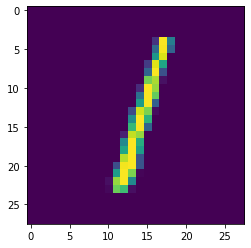

[4.4991168e-05 9.9142367e-01 2.2682282e-03 1.3774086e-04 6.3116243e-04
 1.9821788e-04 2.6236195e-04 3.5987133e-03 1.3759928e-03 5.8887978e-05]
Number is 1


In [ ]:
# 확인
for i, img in enumerate(test_imgs):
    plt.figure()
    plt.imshow(img)
    plt.show()
    print(pred_num[i])
    print("Number is", pred_num[i].argmax())